In [36]:
import requests
import json
import pandas as pd
%matplotlib inline

# there are a few endpoints on this site. Check docs to see what it does
# url = "https://api.opensea.io/api/v1/events?only_opensea=false&offset=0&limit=20"
# url = "https://api.opensea.io/api/v1/assets?order_direction=desc&offset=0&limit=20"
url = "https://api.opensea.io/api/v1/events"

response = requests.request("GET", url)
opensea_data_pull = json.loads(response.text)

In [2]:
# bbb = opensea_data_pull["assets"][5]["asset_contract"]["default_to_fiat"]
# price = opensea_data_pull["asset_events"][0]["payment_token"]["usd_price"]
# bid = opensea_data_pull["asset_events"][0]["bid_amount"]

In [41]:
data_list = opensea_data_pull["asset_events"]

listing_date_list = []
listing_price_list = []

# iterate through each item in list
for each in data_list:
    
    # grab the id
    listing_date = each["asset"]["asset_contract"]["created_date"]
    listing_date = listing_date[0:10]  # reformat dates to be cleaner

    listing_price = (each["bid_amount"])
    try:
        listing_price = float(listing_price)
        listing_price = listing_price/ 10000000000000000
    except:
        listing_price=0

    # append id to list of ids
    listing_date_list.append(listing_date)
    listing_price_list.append(listing_price)



In [42]:
# cleaner method. give column headers
df = pd.DataFrame(
    {'listing_date': listing_date_list,
     'listing_price': listing_price_list
     })


In [43]:
# Top 10 NFT Bids on OceanSea in barchart
bid_price_df = pd.DataFrame(listing_price_list)
top_bids = bid_price_df.sort_values(0, ascending=False)
bid_price= top_bids.head(10)
bid_price

,0
0,3704.5000
15,563.6800
1,315.2000
8,286.0000
10,240.0000
7,113.6900
6,95.7400
19,95.7400
18,80.0000
4,72.8175


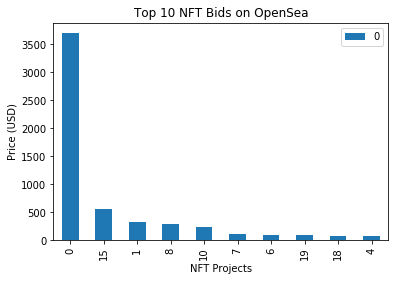

In [44]:
bid_price.plot.bar(title= "Top 10 NFT Bids on OpenSea", xlabel= "NFT Projects", ylabel="Price (USD)" )